In [14]:
# import warnings
# warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.
/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


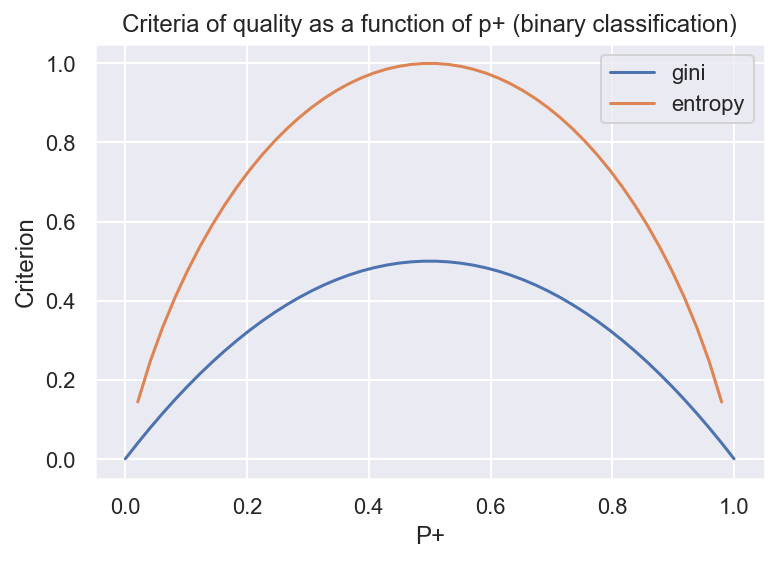

In [15]:
plt.figure(figsize=(6,4))
P = np.linspace(0,1,50) # probability of positive samples
plt.plot(P, [1 - p*p - (1-p)*(1-p) for p in P], label='gini')
plt.plot(P, [-p*np.log2(p) - (1-p)*np.log2(1-p) for p in P], label='entropy')
plt.xlabel('P+')
plt.ylabel('Criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend();

## Telecom Churn Prediction

In [16]:
df = pd.read_csv('../../../data/telecom_churn.csv')

In [17]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


**Convert categorical to numeric features**

In [19]:
df['International plan'] = df['International plan'].map({'Yes':1, 'No':0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes':1, 'No':0})
df['Churn'] = df['Churn'].astype('int')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Remove State variable**

In [ ]:
states = df.pop('State')

In [23]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Split Data (column-wise) into Features and Class**

In [25]:
X, y = df.drop('Churn', axis=1), df['Churn']

In [27]:
X.shape, y.shape

((3333, 18), (3333,))

**Split Data (row-wise) into Training and Test (hold-out set)**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrn, xtst, ytrn, ytst = train_test_split(X, y, test_size=0.3, random_state=17)

In [31]:
xtrn.shape, xtst.shape

((2333, 18), (1000, 18))

**Fit-Predict using a Decision Tree Classifier**

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
tree = DecisionTreeClassifier(random_state = 17)

In [35]:
tree.fit(xtrn, ytrn)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
yprd = tree.predict(xtst)

In [39]:
yprd.shape, ytst.shape

((1000,), (1000,))

In [40]:
accuracy_score(ytst, yprd)

0.921

**Checking if accuracy really makes sense here?**

In [42]:
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

**Searching for optimal decision tree model using grid search (exhaustive search)**

In [46]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [47]:
# setup parameters for Grid Search
prmsRng = {'max_depth' : np.arange(2,11), 
           'min_samples_leaf' : np.arange(2,11)}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [52]:
grdSrchTreeMdls = GridSearchCV(estimator=tree, 
                       param_grid=prmsRng, 
                       cv=skf, 
                       n_jobs=-1, 
                       verbose=1)

In [53]:
grdSrchTreeMdls.fit(xtrn, ytrn)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    3.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [54]:
grdSrchTreeMdls.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [62]:
bstTree = grdSrchTreeMdls.best_estimator_

In [55]:
grdSrchTreeMdls.best_params_

{'max_depth': 6, 'min_samples_leaf': 2}

**Cross-Validation Assessment of Model Quality**

In [56]:
grdSrchTreeMdls.best_score_

0.9417059579939991

**Test-Set (hold-out set) Assessment**

In [58]:
yprd = grdSrchTreeMdls.best_estimator_.predict(xtst)

In [59]:
accuracy_score(ytst, yprd)

0.947

**Exporting data to GraphViz format**

In [61]:
from sklearn.tree import export_graphviz

In [64]:
export_graphviz(decision_tree=bstTree,
                out_file='best_tree.dot',
                filled=True,
                feature_names=df.drop('Churn', axis=1).columns
               )

In [66]:
!ls *.dot

best_tree.dot


In [67]:
!cat best_tree.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Total day minutes <= 264.45\ngini = 0.255\nsamples = 2333\nvalue = [1983, 350]", fillcolor="#e58139d2"] ;
1 [label="Customer service calls <= 3.5\ngini = 0.206\nsamples = 2182\nvalue = [1927, 255]", fillcolor="#e58139dd"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="International plan <= 0.5\ngini = 0.149\nsamples = 2004\nvalue = [1842, 162]", fillcolor="#e58139e9"] ;
1 -> 2 ;
3 [label="Total day charge <= 38.185\ngini = 0.096\nsamples = 1828\nvalue = [1736, 92]", fillcolor="#e58139f1"] ;
2 -> 3 ;
4 [label="Account length <= 224.5\ngini = 0.056\nsamples = 1570\nvalue = [1525, 45]", fillcolor="#e58139f7"] ;
3 -> 4 ;
5 [label="Total eve charge <= 27.965\ngini = 0.055\nsamples = 1568\nvalue = [1524, 44]", fillcolor="#e58139f8"] ;
4 -> 5 ;
6 [label="gini = 0.052\nsamples = 1560\nvalue = [1518, 42]", fillcolor="#e58139f8"] ;
5 -> 6 ;
7 [label="gini = 0.375\nsamples = 8\nvalue = [6, 2]", f

**Use WebGraphViz to Visualize the Tree Structure**
    - Copy paste the .dot file content
    - The content is not downloadable as png/jpg image, instead only HTML

**Instead use pydotplus package with the following imports**

In [71]:
from io import StringIO
import pydotplus # installation required: pip install pydotplus, loads immediately
from ipywidgets import Image

In [75]:
dotData = StringIO()

In [76]:
export_graphviz(decision_tree=bstTree, 
                out_file=dotData,
                filled=True,
                feature_names=df.drop('Churn',axis=1).columns
               )

In [ ]:
graph = pydotplus.graph_from_dot_data(dotData.getvalue())